# Climate Change Sentiment Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM ES2**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### CLIMATE CHANGE SENTIMENT ANALYSIS- OVERVIEW

Problem Statement: 

In the context of focusing on reducing environmental impact and carbon footprint, there is a need to understand the public perception of climate change and its perceived threat level. To enhance our market research efforts and evaluate the potential reception of our products or services, we seek to determine how individuals perceive climate change and whether they believe it poses a real threat. 

**Objective**

Hence, we develop a Machine Learning model capable of classifying individuals' beliefs in climate change based on their tweet data. A successful solution to this problem will provide clients with valuable insights into consumer sentiment across various demographic and geographic categories, enabling them to make informed decisions for future marketing strategies.



**Proccess**

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of predicting tweets;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
import pickle

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

# Machine learning and natural language processing
from comet_ml import Experiment
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_selection
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

# Text processing and preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import string

# Model training and evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB


from IPython.display import Image  # Library for displaying images in Jupyter Notebook

# Data preprocessing and evaluation metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.exceptions import ConvergenceWarning

# Filter and ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Filter and ignore specific warning types
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [ ]:
!pip install wordcloud

In [ ]:
!pip install spacy

In [ ]:
!pip install imbalanced-learn

### Loading experiments to Comet


In [2]:
# Setting the API key (saved as environment variable)
experiment = Experiment(api_key='IJZT0TR4WAfHAxPetqWeGBfBz',
                        project_name="climate-change-sentiment", workspace="chikoeze21")



COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/chikoeze21/climate-change-sentiment/44db7b36c61f42e785fa4754ad5ebc54



<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
# load the data
df_train = pd.read_csv('C:\\Users\\alvar\\Documents\\Data Science\\Advanced Classification\\Advanced_Classification_Predict-student_data-2780\\train.csv')
df_test = pd.read_csv('C:\\Users\\alvar\\Documents\\Data Science\\Advanced Classification\\Advanced_Classification_Predict-student_data-2780\\test_with_no_labels.csv')

In [4]:
df_train.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [6]:
df_test.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

In [4]:
print("Train data:", df_train.shape)
print("Test data:", df_test.shape)

Train data: (15819, 3)
Test data: (10546, 2)


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Missing values and blank strings 

In [8]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [9]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

**Observation:**
* The training dataset has no null values within it.
* The test dataset has no null values within it.

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


**Observation:**
* It shows that we only have two numerical columns and one string column.
* However, we suspect that one of these columns (tweetid) includes unique values in each row, whilst the other column (sentiment) represents our label, and so contains more than two different values.

**Action**
* To establish this guess, we write a function that will reveiw the unique values


In [5]:
# Get the unique labels from the 'sentiment' column in the df_train DataFrame
num_labels = list(df_train.sentiment.unique())
print(num_labels)

[1, 2, 0, -1]


In [6]:
# Get the number of unique tweet IDs in the df_train DataFrame
num_tweetid = df_train.tweetid.nunique()
print(num_tweetid)

15819


In [8]:
# To Assert that the number of unique tweet IDs matches the total number of rows in the df_train DataFrame
num_tweetid == df_train.shape[0]

True

**Observation:**
* 1 The sentiment column contains 4 unique values.
* 2 The TweetId contains all unique value, which is the same as the number of rows, hence each value is a unique identifier for each tweet.

**Action**
* 1 The the tweetid is a case of high cardinality,hence will be dropped during the preprossing phase.
* 2 Senitment will be used as the label (target variable)


**Class Description (given)**

* 2 News: the tweet links to factual news about climate change

* 1 Pro: the tweet supports the belief of man-made climate change

* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

* -1 Anti: the tweet does not believe in man-made climate change Variable definitions

**Features**

* sentiment: Which class a tweet belongs in (refer to Class Description above)

* message: Tweet body

* tweetid: Twitter unique id

### Replace all numeric values with the appropriate labels

In [43]:
# replace all numeric values with the appropriate labels given by the dataset.

# Mapping dictionary for replacement
replacement_dict = {
    -1: "Anti",
    0: "Neutral",
    1: "Pro",
    2: "News"
}

df_class = df_train.copy()
# Replace values in the 'sentiment' column
df_class['sentiment'] = df_class['sentiment'].replace(replacement_dict)

# Print the updated DataFrame
df_class.head()


sentiment                                            message  tweetid
0       Pro  PolySciMajor EPA chief doesn't think carbon di...   625221
1       Pro  It's not like we lack evidence of anthropogeni...   126103
2      News  RT @RawStory: Researchers say we have three ye...   698562
3       Pro  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4       Pro  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [10]:
df_class['sentiment'].value_counts()

Pro        8530
News       3640
Neutral    2353
Anti       1296
Name: sentiment, dtype: int64

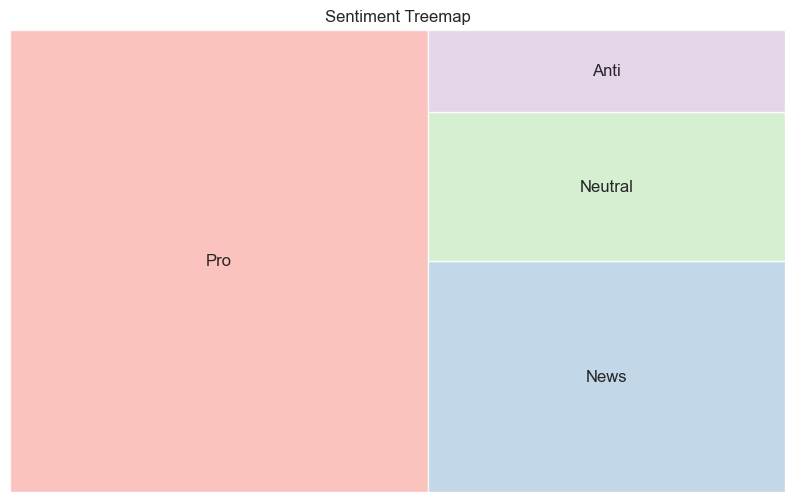

In [165]:
import matplotlib.pyplot as plt
import squarify

sentiment_counts = df_class['sentiment'].value_counts()

# Assign colors to each category
colors = plt.cm.Pastel1(range(len(sentiment_counts)))

# Create the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sentiment_counts.values, 
              label=sentiment_counts.index, 
              color=colors,
              alpha=0.8)

# Customize the plot
plt.title('Sentiment Treemap')
plt.axis('off')

# Display the chart
plt.show()


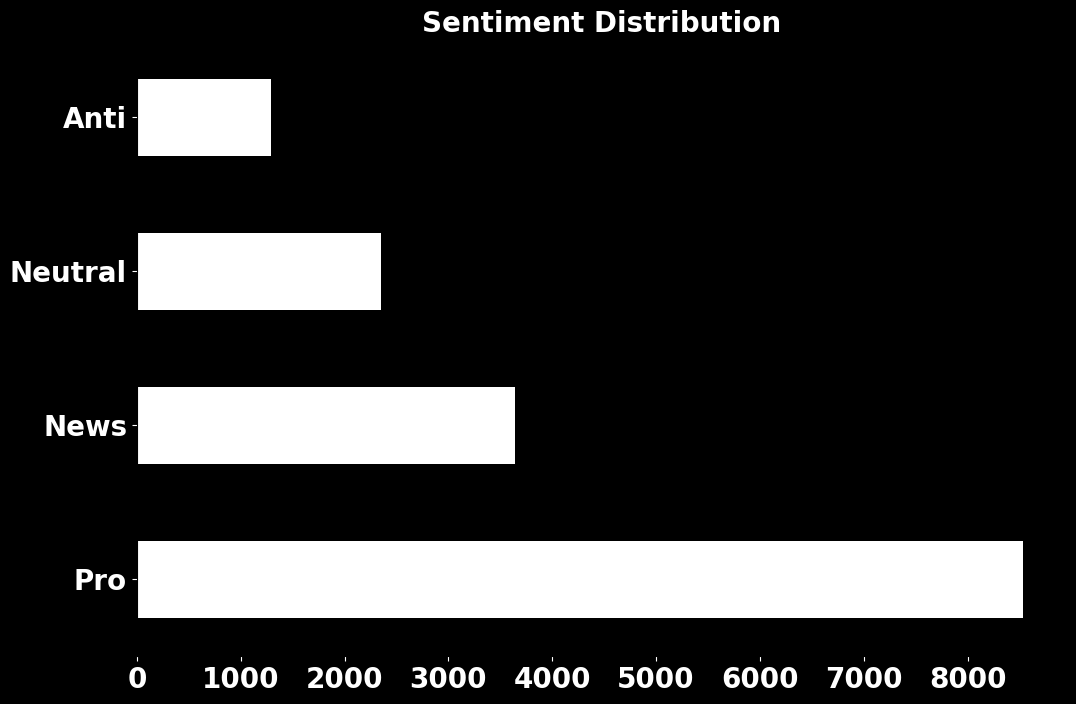

In [62]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Set the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set the background color to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plot the bar chart with white bars
df_class['sentiment'].value_counts().plot(kind='barh', ax=ax, color='white')

# Set the x-axis and y-axis labels color, font size, and font weight
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_fontweight('bold')
ax.yaxis.label.set_fontweight('bold')
ax.xaxis.label.set_fontsize(30)
ax.yaxis.label.set_fontsize(30)

# Set the tick labels color, font size, and font weight
ax.tick_params(axis='x', colors='white', labelsize=20)
ax.tick_params(axis='y', colors='white', labelsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Set the title color, font size, and font weight
ax.set_title('Sentiment Distribution', color='white', fontsize=20, fontweight='bold')

# Show the plot
plt.show()


In [44]:
# Compute the values and percentages
value_counts = df_class.sentiment.value_counts(normalize=True)
percentages = round(value_counts * 100, 2)

# Generate the report
pro_percentage = percentages["Pro"]
news_percentage = percentages["News"]
neutral_percentage = percentages["Neutral"]
anti_percentage = percentages["Anti"]

report = f'''
"Pro tweets" occupy {pro_percentage}% of the total tweets.
"News tweets" occupy {news_percentage}% of the total tweets.
"Neutral tweets" occupy {neutral_percentage}% of the total tweets.
"Anti tweets" occupy {anti_percentage}% of the total tweets.
'''

print(report)

fig = go.Figure(go.Funnel(
    y=["Pro", "News", "Neutral", "Anti"],
    x=percentages
))

fig.show()



"Pro tweets" occupy 53.92% of the total tweets.
"News tweets" occupy 23.01% of the total tweets.
"Neutral tweets" occupy 14.87% of the total tweets.
"Anti tweets" occupy 8.19% of the total tweets.



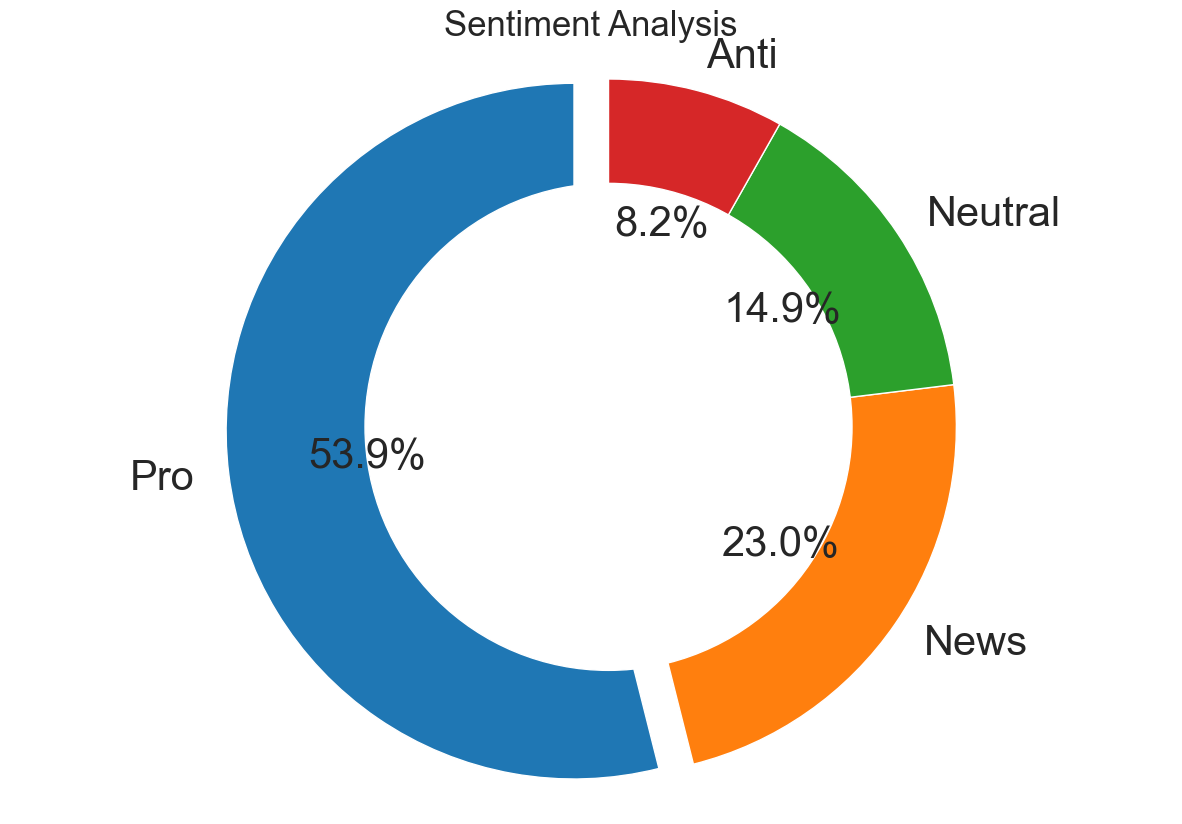

In [169]:
import matplotlib.pyplot as plt

# Compute the values and percentages
value_counts = df_class.sentiment.value_counts(normalize=True)
percentages = round(value_counts * 100, 2)

# Generate the donut chart
labels = ["Pro", "News", "Neutral", "Anti"]
sizes = percentages.values
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
explode = [0.1, 0, 0, 0]  # Explode the first slice

fig, ax = plt.subplots()
pie = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 30})

# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title("Sentiment Analysis", fontsize=25)
plt.show()


**Observations:**

* The entire number of tweets related to news, neutral, and anti is less than half of the overall number of tweets.
* The distribution suggests that the train dataset has a class imbalance.  The effect of this imbalance, 
* The training dataset is skewed to the Pro sentiment category indicating a strong support for the belief of man-made climate change.

**Implications**
* If not attended to, is a model which performs very well at categorising samples of a particular category and fails at others. For an instance, a model built on this train data will perform well in categorising tweets which supports man-made climate change (Pro) but performs way lesser at classifying the Anti tweets.

### An examination of the Message feature

**Non-Graphical Analysis**

### Pro Climate tweet

In [9]:
# Print the full_text of 10 randomly selected pro climate tweets
print('Show the full_text of 10 pro climate tweets: ')
pro_tweets = df_class[df_class['sentiment'] == 'Pro']['message'].sample(10)
for tweet in pro_tweets:
    print(tweet)

Show the full_text of 10 pro climate tweets: 
@RT_America @RT_com @CLuddite @Sheumais63 @Gravantus climate change. We aren't doing enough.
RT @interfaithpower: Trump exec order to undo #climate progress won't undo #climate change . But will make its impacts worse, cost lives, a…
RT @Anger7_Meirala: Just to settle this: 
(1) I am not &amp; never have been a troll
(2) 98% of scientists accept anthropogenic climate change…
RT @bkunkel3: Insurers talk a lot about climate change, but most still do business in coal https://t.co/anFTyFXQMK via @HuffPostPol
RT @wakmax: Just talk about climate change says @alicebell - it'll make you feel better about it. Go on then - have a read https://t.co/N1V…
RT @theecoheroes: Government 'tried to bury' its own frightening report on climate change #environment #climatechange #flood https://t.co/7…
RT @stevesilberman: .@Google makes big committment to slowing climate change, becoming the largest corporate buyer of renewable energy. htt…
You'd think that even

### Anti- Climate tweet

In [18]:
# Print the full_text of 10 randomly selected anti climate tweets
print('Show the full_text of 10 anti climate tweets: ')
pro_tweets = df_class[df_class['sentiment'] == 'Anti']['message'].sample(10)
for tweet in pro_tweets:
    print(tweet)

Show the full_text of 10 anti climate tweets: 
RT @ZehDuck: I just spilled orange juice on my shirt.  I can't decide on whether to blame the Russians or climate change. 🤔
@Altavistagoogle @bmyska global warming my ass ..North America &amp; Europe in a deep freeze ..Please give us some global warming !!
@danoc214 @JustinTrudeau There is no such thing as global warming, you behind the times. The earth has not varied b… https://t.co/cmknXXVJPl
RT @TuckerCarlson: Forget about its poverty or exploding crime rate... the mayor of New Orleans is making climate change a top priorit…
@AbrahamEngel1 @jules_su @realDonaldTrump Me too. You know global warming is a hoax but with all these snowflakes m… https://t.co/ZCYVq9i2sq
RT @FBRASWELL: Who is driving the climate change alarmism? Listen and find out! - Climate Change: What Do Scientists Say? https://t.co/y2CtÃ¢â‚¬Â¦
@lindamama02 @Celinabean723 @ateacher97 @Dena Obama is a weak man who did NOTHING except speak of climate change while the world is

### News about Cliamate Change

In [19]:
# Print the full_text of 10 randomly selected tweet about climate change news
print('Show the full_text of 10 anti climate tweets: ')
pro_tweets = df_class[df_class['sentiment'] == 'News']['message'].sample(10)
for tweet in pro_tweets:
    print(tweet)

Show the full_text of 10 anti climate tweets: 
Niger Delta communities petition UN, accuse oil firms of abusing climate change programme https://t.co/QfO0saBzTt
RT @pablorodas: #CLIMATEchange #p2 RT Energy Dept. rejects Trump’s request to name climate change workers, who remain…… 
RT @CNN: The Centers for Disease Control postponed climate change summit ahead of President Donald Trump's inauguration https://t.co/FXt93f…
RT @CNN: Kids are taking the feds -- and possibly Trump -- to court over climate change https://t.co/oGw21W7Skw
Citizens across the world are suing their governments over #climate change https://t.co/9JBty6d7Dj
RT @508gloryFelix: RFK Jr. issues warning about Trump's climate change policies @CNNPolitics https://t.co/08UzvehZ9j
Ancient methane ‘burp’ points to climate change 110 million years ago https://t.co/abgirnoQgh
RT @jaketapper: EPA chief: Carbon dioxide not 'primary contributor' to climate change (leading scientists say he's wrong) https://t.co/y657…
From racism to

**Unique Words**

In [12]:
def create_bank_set(dataset, word="", category=""):
    df = dataset[dataset['sentiment'] == category]['message'] if category else dataset['message']
    
    bank = [word for row in df for word in row.split()] if word else [char for row in df for char in row]
    
    return pd.DataFrame(bank)

In [21]:
# Usage example
words = create_bank_set(df_train, word=True)
total_words = words.size
count_unique = words[0].nunique()
print("Total words: {}\nUnique words: {}".format(total_words, count_unique))

Total words: 279760
Unique words: 47508


There are about 280,000 total words and 48,000 unique word in the unprocessed train dataset. Considering that there are 15,819 total number of tweets, it can be deduced that each tweet will only contain on the average 47,968 / 15,189 = 3.158 unique word.

**Mention Analysis**

A mention refers to a tweet that includes the username of another person anywhere within the tweet's content. It usually start with the "@" symbol.

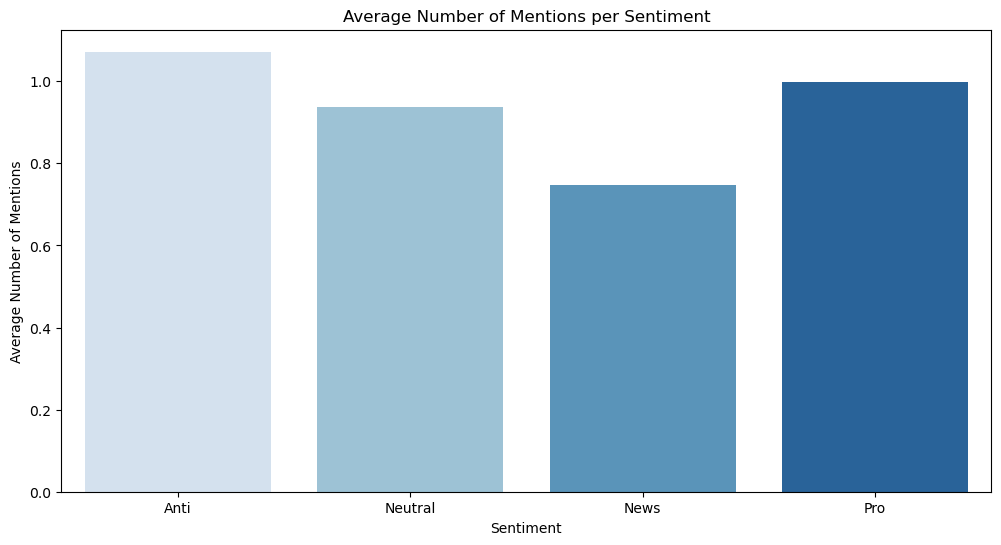

In [22]:
#To asecertain the avaerge number of mentions for each sentiment in a tweet


df_mention = df_class.copy()
df_mention['mentions'] = df_train['message'].apply(lambda x: str(x).count('@'))
mention_counts = df_mention.groupby('sentiment')['mentions'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment', y='mentions', data=mention_counts, palette="Blues")
plt.title('Average Number of Mentions per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Number of Mentions')
plt.show()


In [23]:
mention_counts

sentiment  mentions
0      Anti  1.071759
1   Neutral  0.937527
2      News  0.747253
3       Pro  0.998828

 **Observation:**

The Anti and pro setiments seem to have the most mentions per tweet; most of the tweets have atleast one mention as compared to the news and Neutral sentiment classes which have most tweets either having or not having a mention . Although, expectations would have been that the news class will hold more mentions. 

**Hashtags Analysis**

On Twitter, a hashtag is a word or phrase preceded by the "#" symbol. It is used to categorize and organize tweets based on specific topics or themes. By clicking on a hashtag, users can easily find and join conversations related to that topic. Hashtags increase the visibility of tweets and allow users to discover relevant content, even from accounts they don't follow. Hashtags are also used for events, campaigns, and social causes.

In [40]:
# Creating a function to extract hashtags from tweets

def extract_hashtags(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

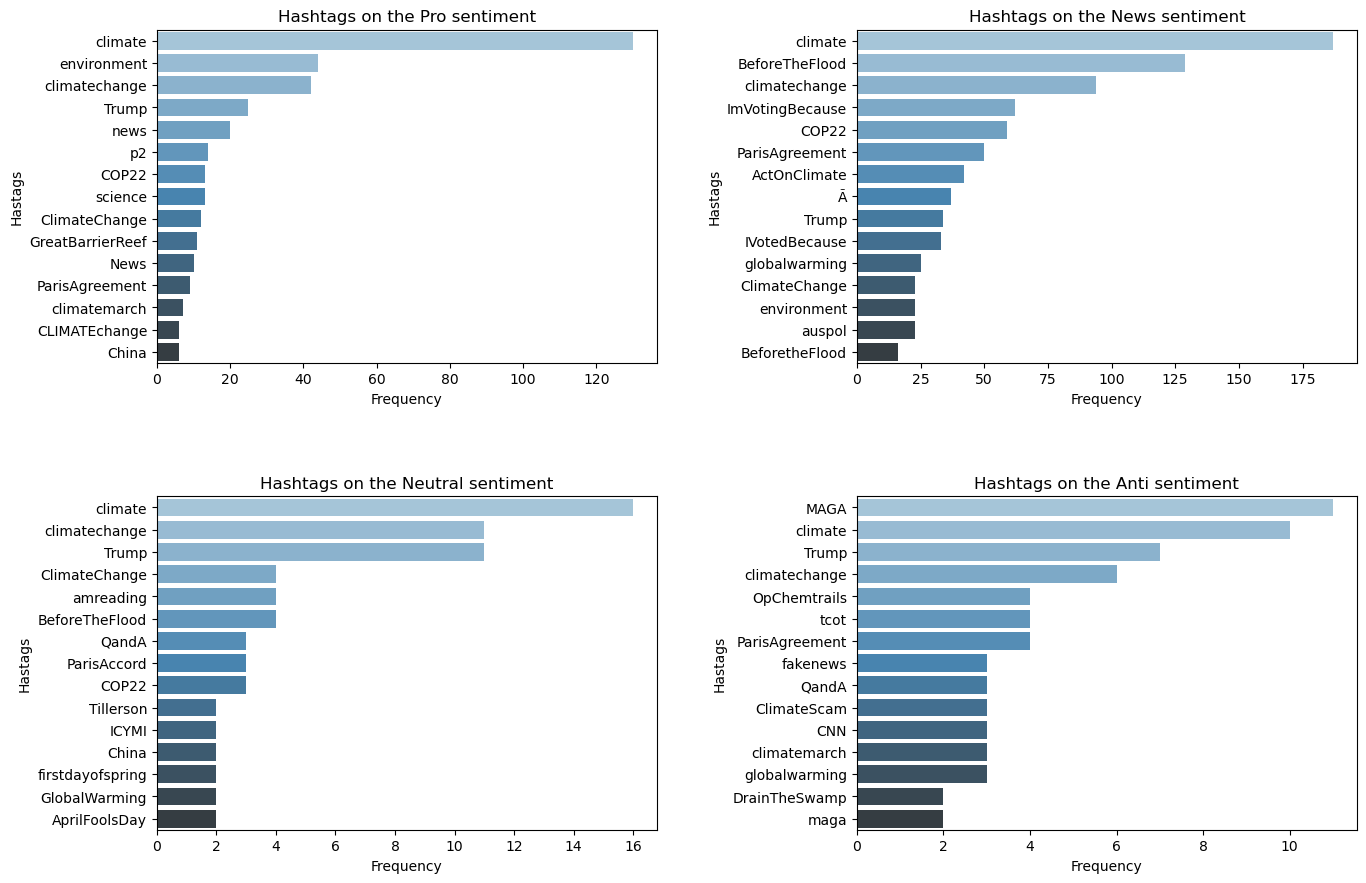

In [49]:
# Extracting hashtags from tweets
news_h = extract_hashtags(df_class['message']
                              [df_class['sentiment'] == "News"])
pro_h = extract_hashtags(df_class['message']
                          [df_class['sentiment'] == "Pro"])
neutral_h = extract_hashtags(df_class['message']
                              [df_class['sentiment'] == "Neutral"])
anti_h = extract_hashtags(df_class['message']
                          [df_class['sentiment'] == "Anti"])

# hashtag list
hashtags = [sum(news_h, []), sum(pro_h, []),
            sum(neutral_h, []),sum(anti_h, [])]
            
# Distribution of words per Class
fig, ax = plt.subplots(2,2, figsize=(15,10))
categories = [1, 2, 0, -1]
labels = ['Pro', 'News', 'Neutral', 'Anti']

pos_x = 0
pos_y = 0 

for i, sent in enumerate(hashtags):
    if i > 1:
        pos_x = 1
        
    pos_y = i % 2
            
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)
            
    sns.barplot(data=df, y='Hashtag', x='Count', palette="Blues_d", ax=ax[pos_x][pos_y])
    ax[pos_x][pos_y].set_ylabel("Hastags")
    ax[pos_x][pos_y].set_title("Hashtags on the " + labels[i] + " sentiment")
    ax[pos_x][pos_y].set_xlabel("Frequency")
    
    
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

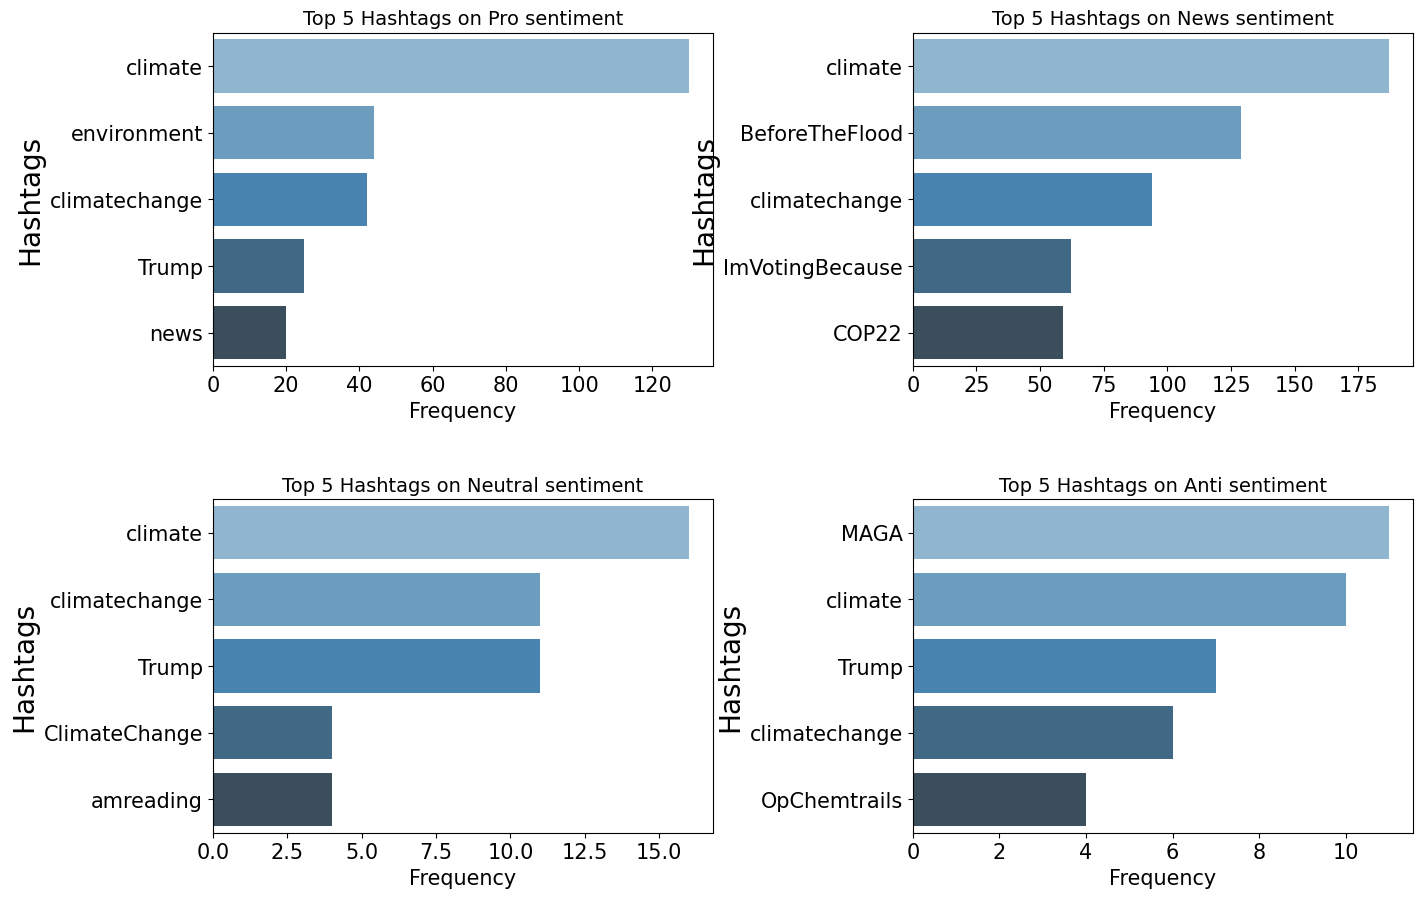

COMET ERROR: Heartbeat processing error


In [69]:
import re
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_hashtags(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

news_h = extract_hashtags(df_class['message'][df_class['sentiment'] == "News"])
pro_h = extract_hashtags(df_class['message'][df_class['sentiment'] == "Pro"])
neutral_h = extract_hashtags(df_class['message'][df_class['sentiment'] == "Neutral"])
anti_h = extract_hashtags(df_class['message'][df_class['sentiment'] == "Anti"])

hashtags = [sum(news_h, []), sum(pro_h, []), sum(neutral_h, []), sum(anti_h, [])]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
categories = [1, 2, 0, -1]
labels = ['Pro', 'News', 'Neutral', 'Anti']

pos_x = 0
pos_y = 0 

for i, sent in enumerate(hashtags):
    if i > 1:
        pos_x = 1
    pos_y = i % 2

    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Hashtag': list(freq_dist.keys()), 'Count': list(freq_dist.values())})
    df = df.nlargest(columns='Count', n=5)  # Get the top 5 hashtags

    sns.barplot(data=df, y='Hashtag', x='Count', palette="Blues_d", ax=ax[pos_x][pos_y])
    ax[pos_x][pos_y].set_ylabel("Hashtags", fontsize=20)
    ax[pos_x][pos_y].set_title("Top 5 Hashtags on " + labels[i] + " sentiment", fontsize=14)
    ax[pos_x][pos_y].set_xlabel("Frequency", fontsize=15)

    ax[pos_x][pos_y].tick_params(axis='both', labelsize=15)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


**Observation:**

* We can see that the top 5 hashtags have similar words like Climate, climate change, Trump and Before the flood
* Before the flood is a popular hashtags used in pro climate change tweets, this refers to a 2016 documentary where actor Leonardo DiCaprio meets with scientists, activists and world leaders to discuss the dangers of climate change and possible solutions.
* In the anti climate change tweets MAGA (Make America great again) is the top popular hashtag. It is a slogan that was often used by Donald Trump during his campaign for elections in 2016. This soon became a trending hashtag to use to show support for Donald Trump., 

**Twitter Handles Analysis**

A Twitter handle, also known as a Twitter username or Twitter ID, is a unique identifier used to represent a user's account on the social media platform Twitter. It typically begins with the "@" symbol followed by a chosen name or combination of letters, numbers, and underscores. For example, if a user's handle is "@JohnDoe," other Twitter users can mention or tag them by including "@JohnDoe" in their tweets. Handles are used to identify and communicate with specific individuals or organizations on Twitter.

In [70]:
# Creating a function to extract handles from tweets
def extract_handles(x):
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

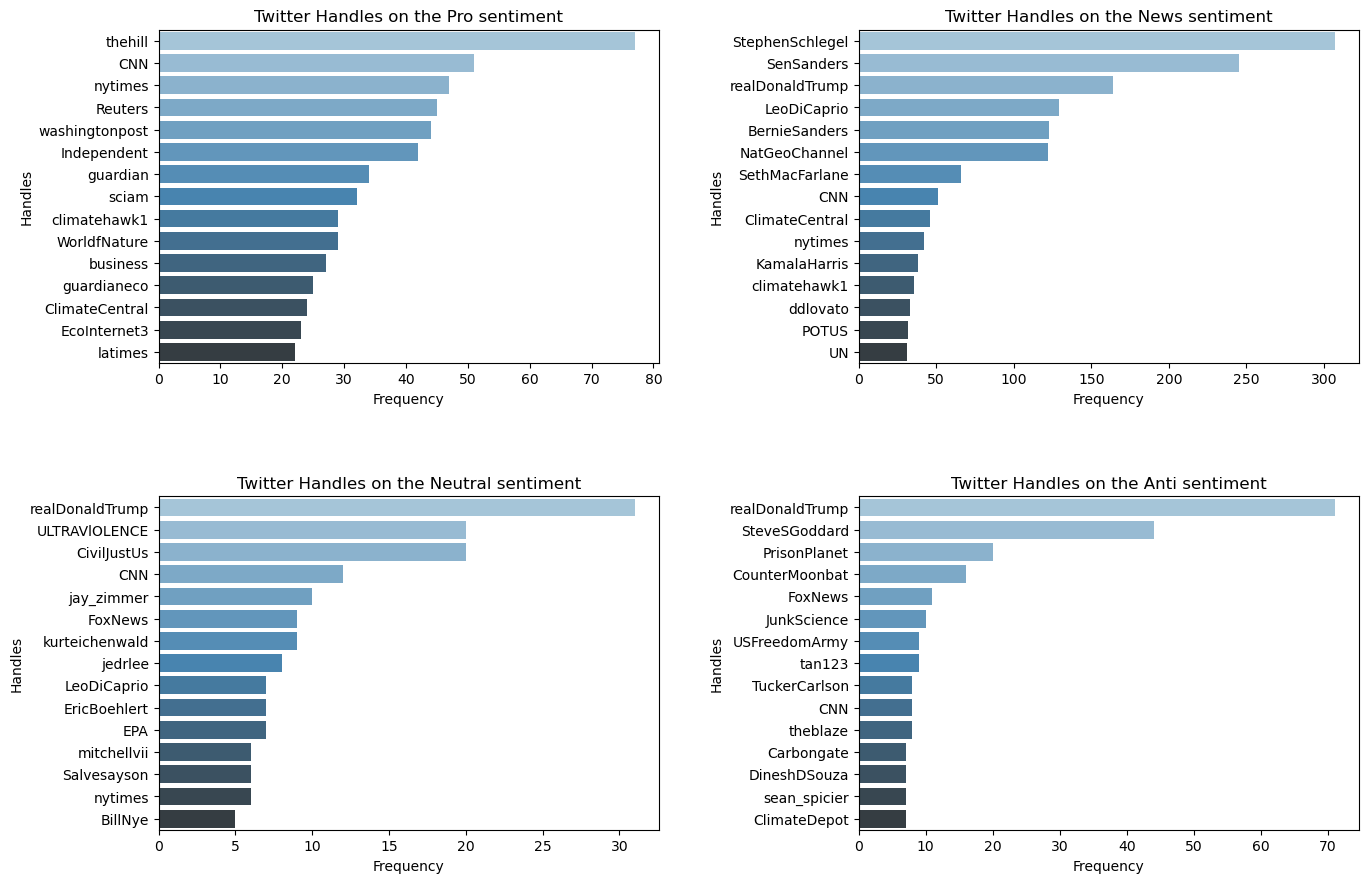

In [26]:
# Extracting handles from tweets
news_h = extract_handles(df_class['message']
                              [df_class['sentiment'] == "News"])
pro_h = extract_handles(df_class['message']
                          [df_class['sentiment'] == "Pro"])
neutral_h = extract_handles(df_class['message']
                              [df_class['sentiment'] == "Neutral"])
anti_h = extract_handles(df_class['message']
                          [df_class['sentiment'] == "Anti"])

# handle lists 
handles = [sum(news_h, []), sum(pro_h, []), sum(neutral_h, []),
           sum(anti_h, [])]

# Distribution of words per Class
fig, ax = plt.subplots(2,2, figsize=(15,10))
categories = [1, 2, 0, -1]
labels = ['Pro', 'News', 'Neutral', 'Anti']

pos_x = 0
pos_y = 0 

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(handles):
    if i > 1:
        pos_x = 1
        
    pos_y = i % 2
   
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    sns.barplot(data=df, y='Handle', x='Count', palette='Blues_d', ax=ax[pos_x][pos_y])
    ax[pos_x][pos_y].set_ylabel("Handles")
    ax[pos_x][pos_y].set_title("Twitter Handles on the " + labels[i] + " sentiment")
    ax[pos_x][pos_y].set_xlabel("Frequency")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

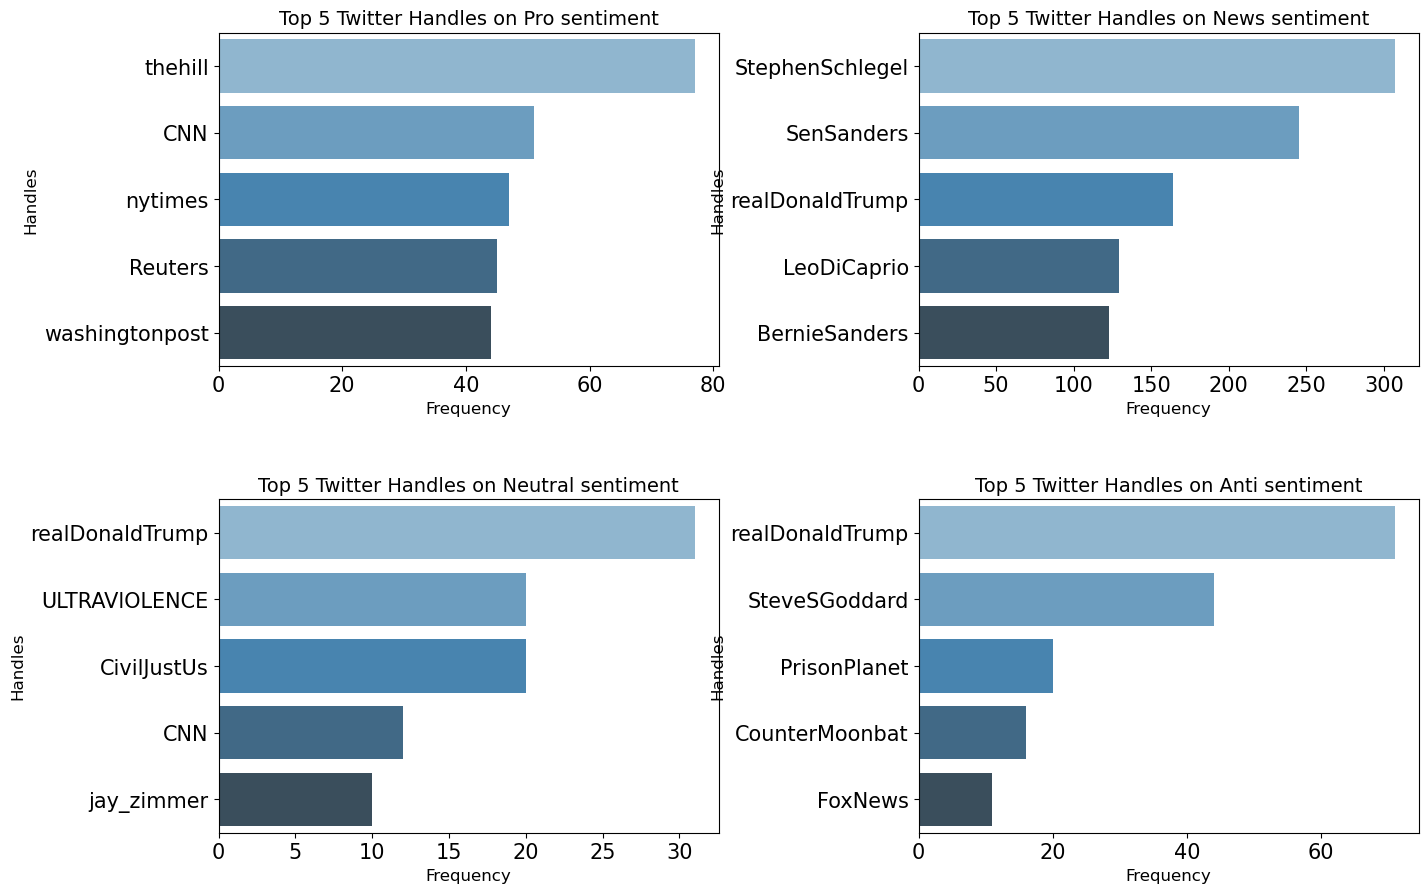

In [72]:


news_h = extract_handles(df_class['message'][df_class['sentiment'] == "News"])
pro_h = extract_handles(df_class['message'][df_class['sentiment'] == "Pro"])
neutral_h = extract_handles(df_class['message'][df_class['sentiment'] == "Neutral"])
anti_h = extract_handles(df_class['message'][df_class['sentiment'] == "Anti"])

handles = [sum(news_h, []), sum(pro_h, []), sum(neutral_h, []), sum(anti_h, [])]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
categories = [1, 2, 0, -1]
labels = ['Pro', 'News', 'Neutral', 'Anti']

pos_x = 0
pos_y = 0 

plt.rcParams['figure.figsize'] = [15, 10]

for i, sent in enumerate(handles):
    if i > 1:
        pos_x = 1
    pos_y = i % 2

    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()), 'Count': list(freq_dist.values())})
    df = df.nlargest(columns='Count', n=5)  # Get the top 5 handles

    sns.barplot(data=df, y='Handle', x='Count', palette='Blues_d', ax=ax[pos_x][pos_y])
    ax[pos_x][pos_y].set_ylabel("Handles", fontsize=12)
    ax[pos_x][pos_y].set_title("Top 5 Twitter Handles on " + labels[i] + " sentiment", fontsize=14)
    ax[pos_x][pos_y].set_xlabel("Frequency", fontsize=12)

    ax[pos_x][pos_y].tick_params(axis='both', labelsize=15)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


**Observations**

From the Visuals above we can all that ...
* The most popular News handles are actual News stations handles
* The most popular Pro handles seem to be celebrity accounts & news station handles.
* Trump features most for most popular Anti & Neutral tweets.

### Tweet Preprocessing

The dataset contains punctuations, links, emojis and twitter specific characters like @ and # symbols. Words also exist in different cases which models might translate and different. Hence, the proceeding function performs cleaning by:
- Remove URLs
- Remove hastags and mentions
- Remove emojis and emoticons
- Remove puntuations, numbers
- Remove retweets and quotes, etc.

**Note: This preprossing is not for the data engineering rather for a better EDA**

In [4]:
def preprocess_tweet(text):
    # change the case of all the words in the text to lowercase 
    text = text.lower()
    
    # Remove links from the text
    url = re.compile(r'https?://\S+|www\.\S+')
    text =  url.sub(r'', text)
    
    # remove punctuation
    text = "".join([x for x in text if x not in string.punctuation])
    
    # Remove Emojis - Emoji Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    return text

In [174]:

def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)
    
    # Remove hashtags and mentions
    tweet = re.sub(r"#\w+|\@\w+", "", tweet)
    
    # Remove emojis and emoticons
    tweet = re.sub(r"(:\s?\)|:-\)|;\)|:-\(|:\'\(|:\s?D|<3|:\s?\/)", "", tweet)
    
    # Remove punctuation
    tweet = re.sub(r"[^\w\s]", "", tweet)
    
    # Remove numbers
    tweet = re.sub(r"\d+", "", tweet)
    
    # Remove retweets and quotes
    tweet = re.sub(r"RT\s|QT\s", "", tweet)
    
    # Remove special characters
    tweet = re.sub(r"[^\w\s]", "", tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r"\s+", " ", tweet).strip()
    
    # Drop words with less than 3 letters
    #tweet = ' '.join(word for word in tweet.split() if len(word) >= 4)
    
    return tweet



In [175]:
df_clean_train = df_train.copy()
df_tweet = df_clean_train["message"]
preprocessed_tweets = df_tweet.apply(preprocess_tweet)
df_clean_train["message"]=preprocessed_tweets

In [176]:
df_clean_test = df_test.copy()
df_tweet_test = df_clean_test["message"]
preprocessed_test_tweets = df_tweet_test.apply(preprocess_tweet)
df_clean_test["message"]=preprocessed_test_tweets

In [181]:
df_clean_test.head(10)

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary unimpeachable evidence that climate ...   224985
3  Putin got to you too Jill Trump doesnt believe...   476263
4  Female orgasms cause global warming Sarcastic ...   872928
5  Trump muzzles employees of several govt agenci...    75639
6  yes wrote that in rd yr Comp Sci ethics part W...   211536
7  Indonesian farmers weather change w conservati...   569434
8  British scientists face a huge hit if the US c...   315368
9  Aid For Agriculture Sustainable agriculture an...   591733

### Graphical Analysis

#### Visualizing the most reoccuring words

In [21]:
full_text = " ".join(df_clean_train['message'])

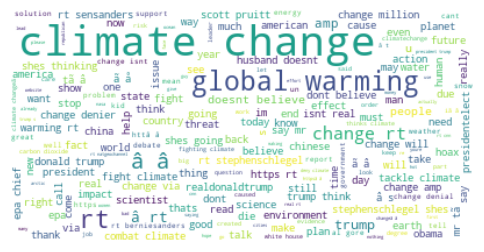

In [22]:
# Create a WordCloud object with white background
wc = WordCloud(background_color='white')

# Generate the word cloud using the 'full_text' variable
img = wc.generate(full_text)

# Create a figure with a size of 6x6 inches
plt.figure(figsize=(6,6))

# Display the word cloud image using imshow() function
plt.imshow(img, interpolation='bilinear')

# Remove the axes from the plot
plt.axis('off')

# Show the plot with the word cloud image
plt.show()


**Observation**

The Most repeated words in the tweet message are:
Climate, Change, Global, Warming, trump e.t.c. 

In [178]:
#Group by Sentiment
group = df_clean_train.groupby('sentiment')

Anti = "".join(group.get_group(-1)['message'])
Neutral = "".join(group.get_group(0)['message'])
Pro = "".join(group.get_group(1)['message'])
News = "".join(group.get_group(2)['message'])

**ANTI-CLIMATE CHANGE**

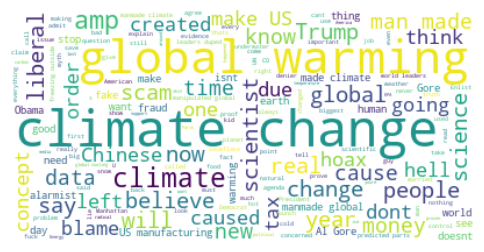

In [179]:
wc = WordCloud(background_color='white')
img = wc.generate(Anti)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.imshow(img, interpolation='bilinear')
plt.show()


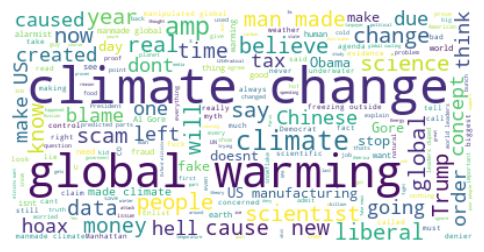

In [182]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for 'Anti' sentiment
wc = WordCloud(background_color='white')
img = wc.generate(Anti)

# Configure plot settings
plt.figure(figsize=(6, 6))
plt.imshow(img, interpolation='bilinear')
plt.axis('off')

# Display the word cloud
plt.show()


**Observation**

Aside climate change, global warming, other unique reoccurring word in the anti climate sentitment worth noting are Chinese, hoax, doesn't, stop, Trump, fake, outside, scientist, scam etc.

**PRO CLIMATE CHANGE**

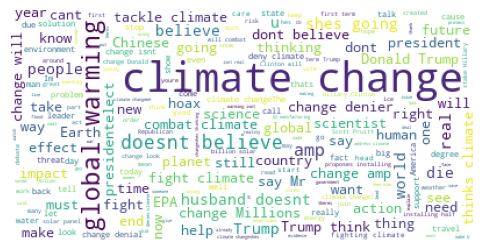

In [180]:
wc = WordCloud(background_color='white')
img = wc.generate(Pro)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()

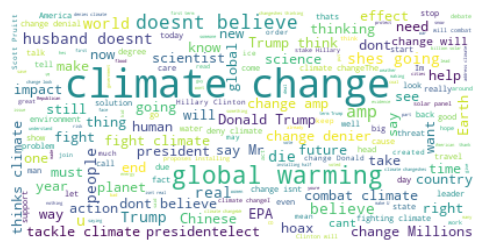

In [183]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for 'Pro' sentiment
wc = WordCloud(background_color='white')
img = wc.generate(Pro)

# Configure plot settings
plt.figure(figsize=(6, 6))
plt.imshow(img, interpolation='bilinear')
plt.axis('off')

# Display the word cloud
plt.show()


**Observation**

Aside climate change, global warming, other unique reoccurring word in the pro climate sentitment worth noting are believe, fighting, solar panel, Trump, Hillary Clinton, scott pruitt, environment etc.

**NEW CLIMATE CHANGE**

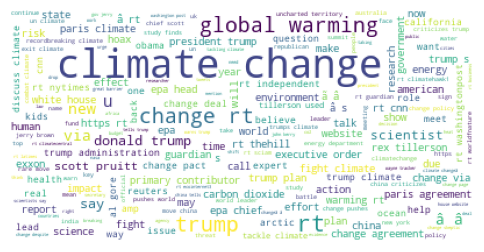

In [34]:
wc = WordCloud(background_color='white')
img = wc.generate(News)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()

**Neutral Climate CHANGE**

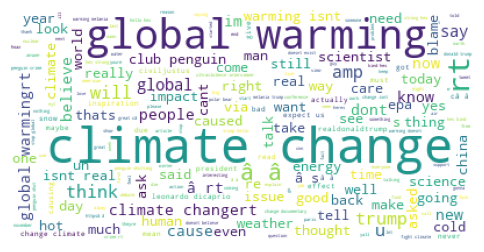

In [35]:
wc = WordCloud(background_color='white')
img = wc.generate(Neutral)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()

**Observation**

Aside climate change, global warming, other unique reoccurring word in the neutral climate sentitment worth noting are Trump, cant, china etc.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

**Drop TweetId Feature**

The tweetId feature contains unique values across the feature. Hence, it will contribute little or nothing to the accuracy of the model. While weighing down the model in terms of computational cost.

In [7]:
def drop_features(dataframe, features):
    df = dataframe.drop(features,  axis='columns')
    return df

In [8]:
# drop tweetid from train dataset (Do not run cell twice)
df_clean_train = drop_features(df_clean_train, ['tweetid'])

# Reserve tweetid for prediction
test_tweet_id = df_clean_test['tweetid']

# drop tweetid from test dataset
df_clean_test = drop_features(df_clean_test, ['tweetid'])

# view snapshot
df_clean_train.head()

sentiment                                            message
0          1  polyscimajor epa chief doesnt think carbon dio...
1          1  its not like we lack evidence of anthropogenic...
2          2  rt rawstory researchers say we have three year...
3          1  todayinmaker wired  2016 was a pivotal year in...
4          1  rt soynoviodetodas its 2016 and a racist sexis...

**Text Tokenization**

In [9]:

def tokenize_text(text):
    # Tokenize the text using nltk
    tokens = nltk.word_tokenize(text)
    return tokens


The function above takes a row of text and return a list of each word in the text. <br /><br />

In [10]:
# Tokenize the train dataset
df_clean_train['message'] = df_clean_train['message'].apply(tokenize_text)

# Tokenize the test dataset
df_clean_test['message'] = df_clean_test['message'].apply(tokenize_text)

df_clean_train['message'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [its, not, like, we, lack, evidence, of, anthr...
2    [rt, rawstory, researchers, say, we, have, thr...
3    [todayinmaker, wired, 2016, was, a, pivotal, y...
4    [rt, soynoviodetodas, its, 2016, and, a, racis...
Name: message, dtype: object

**Remove Stop Words**

Stop words are commonly used words in a language that often do not carry significant meaning and are frequently used as grammatical connectors or fillers. Examples of stop words in English include "the," "is," "and," "in," and "to." These words appear frequently in text but generally do not contribute much to the overall understanding or analysis of the text.

In [11]:
def remove_stop_words(list_of_words):
    # The function takes a list of words and filter out the stop words
    words = [word for word in list_of_words if word not in stopwords.words('english')]
    return words

In [12]:
# Remove stop words from train dataset
df_clean_train['message'] = df_clean_train['message'].apply(remove_stop_words)

# Remove stop words from test dataset
df_clean_test['message'] = df_clean_test['message'].apply(remove_stop_words)

df_clean_train['message'].head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rt, rawstory, researchers, say, three, years,...
3    [todayinmaker, wired, 2016, pivotal, year, war...
4    [rt, soynoviodetodas, 2016, racist, sexist, cl...
Name: message, dtype: object

**LEMMATIZATION**

Lemmatization is a process in natural language processing (NLP) that involves reducing words to their base or root form, known as the lemma. The lemma represents the canonical or dictionary form of a word, from which all inflected forms can be generated.
For example, consider the word "running." Through lemmatization, the word is reduced to its base form or lemma, which is "run." Similarly, "cars" would be lemmatized to "car," "better" would become "good," and so on.

In [13]:
def lemmatize_words(list_of_words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(x) for x in list_of_words]

In [14]:
# lemmatize train set
df_clean_train['message'] = df_clean_train['message'].apply(lemmatize_words)

# lemmatize test set
df_clean_test['message'] = df_clean_test['message'].apply(lemmatize_words)

After the lemmatization, we join the tokenized words together. This is to enable us create features from the field.

In [15]:
#Join all the words in the message field
df_clean_train['message'] = df_clean_train['message'].apply(lambda x: " ".join(x))
df_clean_test['message'] = df_clean_test['message'].apply(lambda x: " ".join(x))

### Features Extraction 

In [16]:

def vectorize_data(train, test):
    vectorizer = TfidfVectorizer(stop_words='english',min_df=1, ngram_range=(1, 2), max_df=0.5)
    train_data = vectorizer.fit_transform(train)
    test_data = vectorizer.transform(test)
    return train_data, test_data, vectorizer


In [17]:
#vectorize the train and test dataset
train_data, test_data, vectorizer = vectorize_data(df_clean_train['message'], df_clean_test['message'])


#pickle the vectorizer into the resources folder
#with open('vectorizer.pkl', 'wb') as fh:
    #pickle.dump(vectorizer, fh)


### Modelling

### Spliting Train Dataset 

To ensure proper model evaluation, it is essential to assess the model's performance on unseen data. Consequently, it is necessary to slipt the training dataset into two distinct subsets: the training dataset, utilized for model training, and the validation set, employed to evaluate the model's performance.

In [18]:
X_train, X_val, y_train, y_val = train_test_split(train_data, df_clean_train['sentiment'], test_size=0.2,  random_state=20)

In [19]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(12655, 105864)
(3164, 105864)
(12655,)
(3164,)


### Feature Selection

The dataset consists of a substantial number of features, precisely 69,408. However, not all of these features contribute positively to the model's performance. In fact, including all features can negatively impact both computational efficiency and overall performance. Therefore, it is crucial to select features that have a positive impact on the model's outcome. In this project, the KBest method was employed for feature selection.

In [20]:
# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=95000)

# Transform (i.e.: run selection on) the training data
train_x_new = selector_kbest.fit_transform(X_train, y_train)
valid_x_new = selector_kbest.transform(X_val)
all_train_new = selector_kbest.transform(train_data)
all_test_new = selector_kbest.transform(test_data)

C:\Users\alvar\anaconda3\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 0 0 ... 0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\alvar\anaconda3\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Correcting imbalance using oversampling 

Class imbalance occurs when the training dataset has an unequal distribution of samples across different classes, leading to challenges in model performance. To address this issue, the Synthetic Minority Oversampling Technique (SMOTE) is employed. SMOTE generates synthetic data points to increase the representation of minority classes, reducing the risk of data loss and overfitting. By balancing the class distribution, SMOTE improves the model's ability to predict all classes effectively.

In [21]:
sm = SMOTE(random_state=20)
train_x_new, train_y_new = sm.fit_resample(train_x_new, y_train)
all_train_new, all_y_new = sm.fit_resample(all_train_new, df_clean_train['sentiment'])

print("The training dataset has " + str(train_x_new.shape) + " shape")
print("The testing dataset has " + str(train_x_new.shape) + " shape")

The training dataset has (27216, 95000) shape
The testing dataset has (27216, 95000) shape


**Functions to create metrics and save an experiment**

In [22]:
def get_metrics(y_pred, y_test):
    metrics = {}
    metrics['precision'] = precision_score(y_test, y_pred, average=None)
    metrics['recall'] = recall_score(y_test, y_pred, average=None)
    metrics['f1-score'] = f1_score(y_test, y_pred, average=None)
    metrics['accuracy'] =  accuracy_score(y_test, y_pred)
    return metrics

In [23]:
def run_experiment(model, name, X_test, y_test):
   
    experiment.set_name(name)
    
    with experiment.validate():
        y_pred = model.predict(X_test)
        metrics = get_metrics(y_pred, y_test)
        experiment.log_metrics(metrics)
        experiment.log_confusion_matrix(y_test, y_pred)
        
    experiment.end()

<a id="five"></a>
## 5. Model Evaluation and Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

This project section primarily involves the development, training, and evaluation of classification models. The models are assessed using accuracy, precision, and recall metrics to determine the most suitable one for the desired objective.
|

In [29]:
names = ['Logistic Regression', 'Nearest Neighbors', 
         'Ridge', 'Support Vector',          
         'Random Forest', 'Naive Bayes']

In [33]:
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(3),
    RidgeClassifier(),
    SVC(gamma=2, C=1, kernel='linear'),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MultinomialNB()
]


In [34]:

results = []
models = {}
confusion = {}
class_report = {}

for name, clf in zip(names, classifiers):
    print('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_val)
    
    print('... scoring')
    accuracy = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='micro')
    recall = metrics.recall_score(y_train, y_pred, average='micro')
    
    f1 = metrics.f1_score(y_train, y_pred, average='micro')
    f1_test = metrics.f1_score(y_val, y_pred_test, average='micro')
    
    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace=True)

print('... All done!')


Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Ridge model...
... predicting
... scoring
Fitting Support Vector model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
... All done!


In [36]:
results.sort_values('F1 Train', ascending=False)

Accuracy  Precision    Recall  F1 Train   F1 Test  \
Classifier                                                               
Ridge                0.993915   0.993915  0.993915  0.993915  0.738938   
Support Vector       0.972975   0.972975  0.972975  0.972975  0.733881   
Logistic Regression  0.861715   0.861715  0.861715  0.861715  0.704172   
Naive Bayes          0.727539   0.727539  0.727539  0.727539  0.643489   
Random Forest        0.537653   0.537653  0.537653  0.537653  0.545512   
Nearest Neighbors    0.457685   0.457685  0.457685  0.457685  0.263590   

                     Train Time  
Classifier                       
Ridge                  0.326827  
Support Vector        37.860469  
Logistic Regression    6.147540  
Naive Bayes            0.015546  
Random Forest          0.068452  
Nearest Neighbors      0.002232

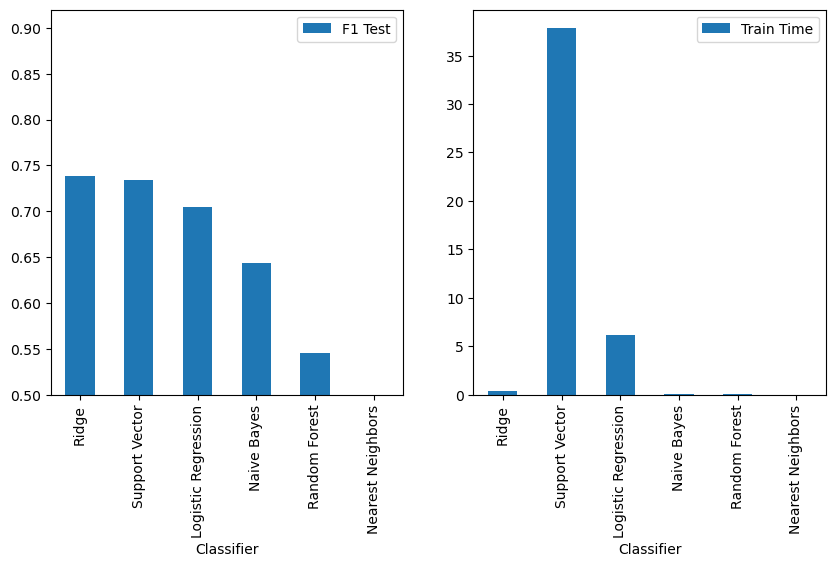

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.50,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1]);

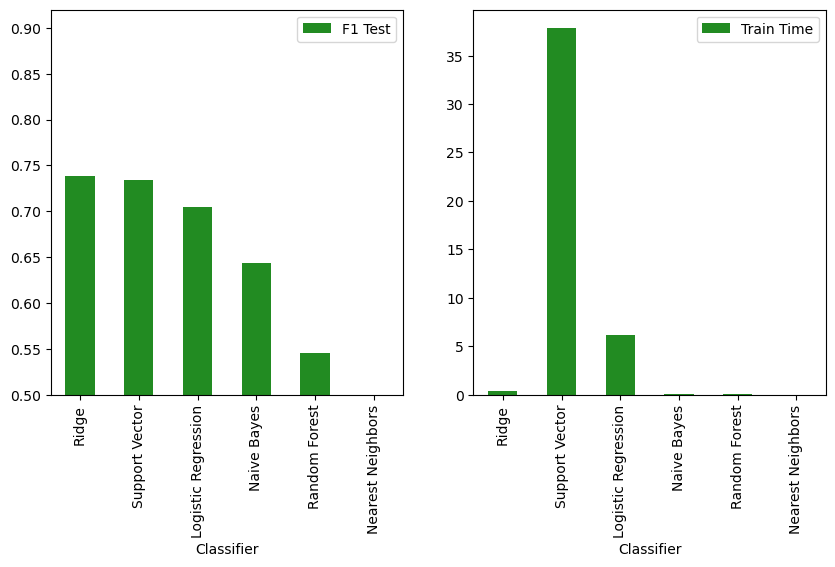

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0, 1.1], ylim=[0.50, 0.92], color='forestgreen')
results.plot(y='Train Time', kind='bar', ax=ax[1], color='forestgreen')

plt.show()


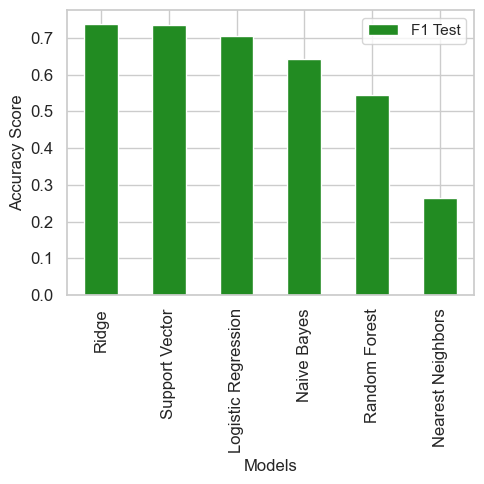

In [137]:
# Sort the results dataframe by F1 Train values in descending order
results.sort_values('F1 Train', ascending=False, inplace=True)

# F1 Test graph
fig1, ax1 = plt.subplots(figsize=(5, 5))
results.plot(y='F1 Test', kind='bar', ax=ax1, color='forestgreen')
ax1.set_xlabel("Models", fontsize=12)
ax1.set_ylabel("Accuracy Score", fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

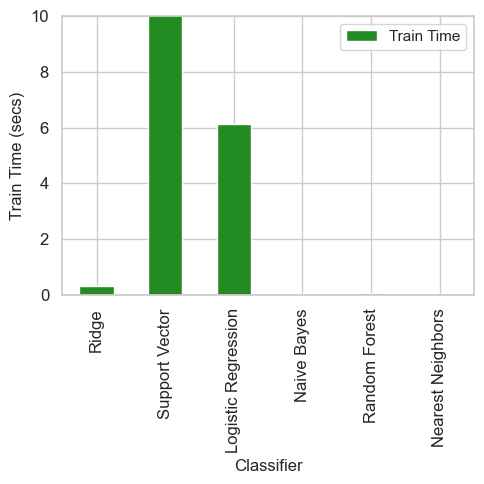

In [164]:
fig2, ax2 = plt.subplots(figsize=(5, 5))
results.plot(y='Train Time', kind='bar', ax=ax2, color='forestgreen',xlim=[0,1.1], ylim=[0,10])
ax2.set_ylabel("Train Time (secs)", fontsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()


This is way too many numbers to comprehend. Let's plot these values to see if we can make sense of them.

**Random Forest Classifier Model**

The Random Forest Classifier is an ensemble learning algorithm commonly used for classification tasks. It constructs multiple decision trees using random subsets of the training data and features. By combining the predictions of these trees, the algorithm provides robustness to noise and outliers, estimates feature importance, handles large datasets efficiently, and captures non-linear relationships. It is widely applied in finance, healthcare, and natural language processing for its strong performance and adaptability.

In [29]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_val)
print(classification_report(y_val, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.91      0.27      0.42       272
      1: Pro       0.68      0.28      0.40       477
  0: Neutral       0.68      0.93      0.79      1726
    -1: Anti       0.81      0.62      0.70       689

    accuracy                           0.71      3164
   macro avg       0.77      0.53      0.58      3164
weighted avg       0.73      0.71      0.68      3164



**Outcome**

The Random Forest Classifier model, from the confusion matrix, indicates that the model will generate the correct prediction 71% of the time (accuracy) - just a little above the base accuracy (70%). Hence, there is a need to try other models in a bid to find better performance.

## Support Vector Classifier

In [46]:
svc_model = SVC(gamma=2, C=1, kernel='linear')
svc_model.fit(X_train, y_train)
predictions = svc_model.predict(X_val)
print(classification_report(y_val, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.74      0.41      0.53       272
      1: Pro       0.55      0.48      0.51       477
  0: Neutral       0.77      0.85      0.81      1726
    -1: Anti       0.74      0.74      0.74       689

    accuracy                           0.73      3164
   macro avg       0.70      0.62      0.65      3164
weighted avg       0.73      0.73      0.72      3164



### Ridge Classifier

Unlike the Random Forest Classifier, the Ridge Classifier is a linear model which builds on the Linear regressor to improve performance. Since the considered problem is high dimentional (many features) and high dimensional problems are likely to be linearly separable meaning the different point can be sepehrated with a linear classifier, regardless of how the points are labelled. So linear classifiers like ridge regression or SVM with a linear kernel, are likely to do well. Hence, the choice to implement the Ridge Classifier

In [47]:
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)
predictions = ridge_model.predict(X_val)
print(classification_report(y_val, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

              precision    recall  f1-score   support

     2: News       0.81      0.43      0.57       272
      1: Pro       0.58      0.46      0.51       477
  0: Neutral       0.77      0.85      0.81      1726
    -1: Anti       0.71      0.75      0.73       689

    accuracy                           0.73      3164
   macro avg       0.72      0.62      0.65      3164
weighted avg       0.73      0.73      0.73      3164



In [102]:


ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]
results = []

for k in ks:
    print('Fitting ridge model with k = {:d}'.format(k))
    ridge = RidgeClassifier(k)
    run_time = %timeit -q -o ridge.fit(X_train, y_train)
    
    # predicting
    y_pred = ridge.predict(X_train)   
    y_pred_test = ridge.predict(X_val)
    
    # scoring
    accuracy = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')  # Change average to 'weighted'
    recall = metrics.recall_score(y_train, y_pred, average='weighted')  # Change average to 'weighted'
    f1 = metrics.f1_score(y_train, y_pred, average='weighted')  # Change average to 'weighted'
    f1_test = metrics.f1_score(y_val, y_pred_test, average='weighted')  # Change average to 'weighted'
    
    # save the results 
    results.append([k, accuracy, precision, recall, f1, f1_test, run_time.best])
    
results = pd.DataFrame(results, columns=['KNN', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Ridge', inplace=True)


Fitting ridge model with k = 1
Fitting ridge model with k = 2
Fitting ridge model with k = 3
Fitting ridge model with k = 4
Fitting ridge model with k = 5
Fitting ridge model with k = 6
Fitting ridge model with k = 7
Fitting ridge model with k = 8
Fitting ridge model with k = 9
Fitting ridge model with k = 10
Fitting ridge model with k = 20
Fitting ridge model with k = 50
Fitting ridge model with k = 100


Lets print off the training classification report, as well as the F1-score of predicting on the test set, so that we can analyse the models' performance.

In [103]:
results

Accuracy  Precision    Recall  F1 Train   F1 Test  Train Time
KNN                                                               
1    0.993915   0.993932  0.993915  0.993911  0.714696    0.435203
2    0.957408   0.959278  0.957408  0.956891  0.691431    0.281587
3    0.896642   0.908625  0.896642  0.892249  0.668421    0.268328
4    0.838641   0.866568  0.838641  0.825652  0.651868    0.241228
5    0.802766   0.843015  0.802766  0.782137  0.638145    0.246404
6    0.775820   0.826367  0.775820  0.748143  0.625913    0.254442
7    0.754959   0.813822  0.754959  0.720903  0.618472    0.223403
8    0.737574   0.805079  0.737574  0.698752  0.610933    0.247061
9    0.722718   0.796009  0.722718  0.678102  0.599998    0.217434
10   0.709127   0.788935  0.709127  0.660017  0.589219    0.183141
20   0.634848   0.756141  0.634848  0.554428  0.522675    0.176246
50   0.558356   0.666934  0.558356  0.420417  0.414643    0.163430
100  0.539313   0.621591  0.539313  0.379714  0.389416    0.138408

These numbers are rather hard to read. Lets print out a graph of the F1 scores and see the comparision of the training and testing scores.

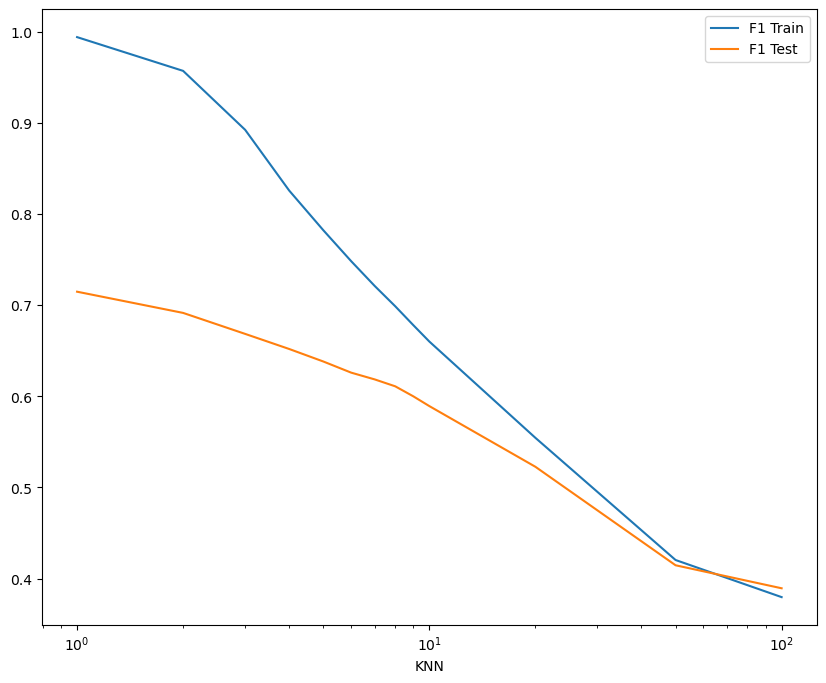

In [104]:
results[['F1 Train', 'F1 Test']].plot(kind = 'line', figsize=(10, 8), logx=True);

In [76]:

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Create the RidgeClassifier model
ridge_model = RidgeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the validation set
predictions = best_model.predict(X_val)

# Print classification report
target_names = ['2: News', '1: Pro', '0: Neutral', '-1: Anti']
print(classification_report(y_val, predictions, target_names=target_names))

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


              precision    recall  f1-score   support

     2: News       0.85      0.41      0.55       272
      1: Pro       0.64      0.38      0.48       477
  0: Neutral       0.74      0.90      0.81      1726
    -1: Anti       0.76      0.73      0.75       689

    accuracy                           0.74      3164
   macro avg       0.75      0.60      0.65      3164
weighted avg       0.74      0.74      0.72      3164

Best Hyperparameters: {'alpha': 0.1}


**Logistic Regesssion**

In [48]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
predictions = lg_model.predict(X_val)
report = classification_report(y_val, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti'])
print(report)

              precision    recall  f1-score   support

     2: News       0.80      0.39      0.52       272
      1: Pro       0.63      0.44      0.52       477
  0: Neutral       0.76      0.89      0.82      1726
    -1: Anti       0.76      0.75      0.75       689

    accuracy                           0.75      3164
   macro avg       0.74      0.62      0.65      3164
weighted avg       0.74      0.75      0.73      3164



C:\Users\alvar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Nearest Neighbour Classifier**

Having considered models based on linear and unlinear layout of datapoints, an algorithms which based on an entirely different appraoch is considered. Hence, the K-Nearest Neighbor classifier is considered. The K-Nearest Neighbor classifier is a nonparametric classification method which uses plurality of vote of its neighbors for classification. K is the defined number of neighbors used in voting.

In [78]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_val)
report = classification_report(y_val, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti'])
print(report)


              precision    recall  f1-score   support

     2: News       0.82      0.14      0.23       272
      1: Pro       0.20      0.99      0.33       477
  0: Neutral       0.80      0.26      0.39      1726
    -1: Anti       0.91      0.27      0.41       689

    accuracy                           0.36      3164
   macro avg       0.68      0.41      0.34      3164
weighted avg       0.73      0.36      0.37      3164



In [31]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
predictions = nb_model.predict(X_val)
report = classification_report(y_val, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti'])
print(report)


              precision    recall  f1-score   support

     2: News       1.00      0.03      0.05       272
      1: Pro       1.00      0.06      0.12       477
  0: Neutral       0.61      0.99      0.75      1726
    -1: Anti       0.91      0.42      0.58       689

    accuracy                           0.64      3164
   macro avg       0.88      0.38      0.37      3164
weighted avg       0.77      0.64      0.56      3164



## Run Experiments on Comet

In [84]:
# Logging the experiment for Logistic Regression Model

run_experiment(lg_model, "Logistic Reg", X_val, y_val)

COMET WARNING: Cannot safely convert array([0.34441088, 0.34285714, 0.78708134, 0.70429655]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.96610169, 0.70588235, 0.67033415, 0.83935743]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.20955882, 0.22641509, 0.95307068, 0.60667634]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET ERROR: Error creating confusion matrix: 0; ignoring
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https:

In [87]:
# Logging the experiment for Randomforest Model

run_experiment(rf_model, "Random Forest", X_val, y_val)

COMET WARNING: Cannot safely convert array([0.41926346, 0.4       , 0.78697356, 0.69901316]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.91358025, 0.68181818, 0.68150975, 0.80645161]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.27205882, 0.28301887, 0.93105446, 0.61683599]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET ERROR: Error creating confusion matrix: 0; ignoring
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https:

In [80]:
# Logging the experiment for Support vector Classifier

run_experiment(svc_model, "Support vector", X_val, y_val)

COMET WARNING: Cannot safely convert array([0.44751381, 0.44219653, 0.80589558, 0.74744296]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.9       , 0.71162791, 0.70838823, 0.8161512 ]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.29779412, 0.32075472, 0.93453071, 0.68940493]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET ERROR: Error creating confusion matrix: 0; ignoring
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https:

In [97]:
# Logging the experiment for ridge_model

run_experiment(ridge_model, "ridge model", X_val, y_val)

COMET WARNING: Cannot safely convert array([0.52242744, 0.43567251, 0.81030563, 0.74425727]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.92523364, 0.71980676, 0.71831617, 0.78768233]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.36397059, 0.31236897, 0.92931634, 0.7053701 ]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET ERROR: Error creating confusion matrix: 0; ignoring
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https:

In [89]:
# Logging the experiment for Naive Bayes Classifier

run_experiment(nb_model, "Naive Bayes", X_val, y_val)

COMET WARNING: Cannot safely convert array([0.05017921, 0.1183432 , 0.75358482, 0.57680872]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([1.       , 1.       , 0.6084788, 0.909375 ]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.02573529, 0.06289308, 0.98957126, 0.42235123]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET ERROR: Error creating confusion matrix: 0; ignoring
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://ww

In [91]:
# Logging the experiment for Naive Bayes Classifier

run_experiment(knn_model, "K-Nearest", X_val, y_val)

COMET WARNING: Cannot safely convert array([0.23343849, 0.3330976 , 0.39284155, 0.41479821]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.82222222, 0.20034028, 0.79646018, 0.91133005]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.13602941, 0.98742138, 0.26071842, 0.26850508]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET ERROR: Error creating confusion matrix: 0; ignoring
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https:

In [93]:
# Logging the experiment for Naive Bayes Classifier

run_experiment(knn_model, "K-Nearest", X_val, y_val)

COMET WARNING: Cannot safely convert array([0.23343849, 0.3330976 , 0.39284155, 0.41479821]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.82222222, 0.20034028, 0.79646018, 0.91133005]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET WARNING: Cannot safely convert array([0.13602941, 0.98742138, 0.26071842, 0.26850508]) object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET ERROR: Error creating confusion matrix: 0; ignoring
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https:

In [ ]:
experiment.end()

### Kaggle Submission

The kaggle submission is accessed based on accuracy of the model. Therefore for this task, the selection of model will be based on classification accuracy. From the modeling and evaluation section, the ridge model has the highest accuracy score. Hence, a ridge regression model is trained and used for prediction to be submitted to kaggle.

In [61]:
final_ridge_model = RidgeClassifier()
final_ridge_model.fit(train_data, df_clean_train['sentiment'])
predictions = final_ridge_model.predict(test_data)

In [62]:
submission = pd.DataFrame({'tweetid': df_tweet_test, 'sentiment':predictions})
submission.to_csv('ridge_submission.csv', index=False)

predictions.shape

(10546,)

COMET ERROR: Heartbeat processing error


In [143]:
predictions

array([1, 1, 1, ..., 2, 0, 1], dtype=int64)

In [41]:
final_svc_model = SVC(gamma=2, C=1)
final_svc_model.fit(train_data, df_clean_train['sentiment'])
predictions = final_svc_model.predict(test_data)

In [43]:
submission = pd.DataFrame({'tweetid': df_tweet_test, 'sentiment':predictions})
submission.to_csv('SVC_submission.csv', index=False)

predictions.shape

(10546,)

In [45]:
predictions

array([1, 1, 1, ..., 2, 0, 1], dtype=int64)

In [61]:
final_logistic = LogisticRegression()
final_logistic.fit(train_data, df_clean_train['sentiment'])
predictions = final_logistic.predict(test_data)

C:\Users\alvar\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [62]:
submission = pd.DataFrame({'tweetid': df_tweet_test, 'sentiment':predictions})
submission.to_csv('log_submission.csv', index=False)

predictions.shape

(10546,)

In [65]:
predictions

array([1, 1, 1, ..., 2, 0, 1], dtype=int64)

### SAVING OUR MODEL

The models developed in this notebook is intended to be deployed on the Edge web application. Since each model has its strenght and weeknesses, the application will contain section which allows users to select which model they intend to use. Hence, a copy of all the useful models trained in this notebook is pickeled.

In [49]:
import pickle

model_save_path = "ridge_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(ridge_model,file)
    

In [50]:
model_save_path = "svc_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svc_model,file)

In [51]:
model_save_path = "logistic_reg.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lg_model,file)

In [30]:
model_save_path = "random_forest.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf_model,file) 

In [60]:
model_save_path = "Naive_Bayes.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(nb_model,file) 